<a href="https://colab.research.google.com/github/DAVIDKSOUSA/DATA-SCIENCE-NA-PR-TICA/blob/master/05_Backtesting_com_Pyfolio_Python_para_Investimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ricos pelo Acaso

Link para o vídeo: https://youtu.be/d2qrsCfXung

# 1. Importando bibliotecas

In [1]:
# O Pyfolio está apresentado erro com a versão 1.0 do Pandas por isso acrescentei esse código para que o Google Colab use a versão anterior. Será necessário o restart da Runtime.
!pip install pandas==0.25.3

In [2]:
# Conferindo a versão do Pandas que está sendo usada
import pandas as pd
pd.__version__

'0.25.3'

In [3]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
#import pandas_datareader.data as web
#yf.pdr_override()

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!pip install pyfolio
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/pyfolio/pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'


# 2. Obtendo e tratando os dados

In [0]:
#tickers = ["ABEV3.SA", "ITSA4.SA", "WEGE3.SA", "USIM5.SA", "VALE3.SA", '^BVSP']
#dados_yahoo = web.get_data_yahoo(tickers, period="5y")["Adj Close"]

#tickers = "ABEV3.SA ITSA4.SA WEGE3.SA USIM5.SA VALE3.SA ^BVSP"
#dados_yahoo = yf.download(tickers=tickers, period="5y")['Adj Close']


In [6]:
vale = yf.download("VALE3.SA", period="1y")['Adj Close']
vale

[*********************100%***********************]  1 of 1 completed


Date
2019-05-13    46.205635
2019-05-14    46.361504
2019-05-15    46.712212
2019-05-16    45.202225
2019-05-17    46.488148
                ...    
2020-05-05    43.700001
2020-05-06    44.330002
2020-05-07    46.049999
2020-05-08    48.919998
2020-05-11    47.730000
Name: Adj Close, Length: 247, dtype: float64

In [7]:
petr3 = yf.download("PETR3.SA", period="3y")['Adj Close']
petr3

[*********************100%***********************]  1 of 1 completed


Date
2017-05-11    14.511474
2017-05-12    15.089282
2017-05-15    15.335558
2017-05-16    15.335558
2017-05-17    15.250308
                ...    
2020-05-05    18.670000
2020-05-06    17.940001
2020-05-07    18.299999
2020-05-08    19.629999
2020-05-11    19.030001
Name: Adj Close, Length: 746, dtype: float64

In [8]:
bova = yf.download("BOVA.SA", period="3y")["Adj Close"]
bova

[*********************100%***********************]  1 of 1 completed


Date
2017-11-15    45.700001
2017-11-16    45.700001
2017-11-20    45.700001
2017-11-22    45.700001
2017-11-23    45.700001
2017-11-28    45.700001
2017-12-06    45.700001
2017-12-07    45.700001
2017-12-11    45.700001
2017-12-12    45.700001
2017-12-14    45.700001
2017-12-26    45.700001
2017-12-27    45.700001
2017-12-29    45.700001
2018-01-08    45.700001
2018-01-09    45.700001
2018-01-31    45.700001
2018-02-05    45.700001
2018-02-15    45.700001
2018-02-16    45.700001
2018-02-19    45.700001
2018-02-20    45.700001
2018-02-21    45.700001
2018-02-22    45.700001
2018-02-23    45.700001
2018-04-10    45.700001
2018-04-16    45.700001
2018-04-17    45.700001
2018-05-02    45.700001
2018-05-15    45.700001
2018-05-16    45.700001
2018-05-21    45.700001
2018-06-05    45.700001
2018-06-06    45.700001
2018-06-08    45.700001
2018-06-15    45.700001
2018-06-22    45.700001
2018-06-26    45.700001
2018-06-28    45.700001
2018-07-03    45.700001
2018-07-06    45.700001
2018-07-11 

In [9]:
carteira = pd.concat([vale, petr3, bova], axis=1, join_axes=[bova.index])
carteira

,Adj Close,Adj Close,Adj Close
Date,,,
2017-11-15,NaN,15.202947,45.700001
2017-11-16,NaN,15.487116,45.700001
2017-11-20,NaN,15.648142,45.700001
2017-11-22,NaN,15.629198,45.700001
2017-11-23,NaN,15.761810,45.700001
2017-11-28,NaN,15.420808,45.700001
2017-12-06,NaN,15.155586,45.700001
2017-12-07,NaN,15.022974,45.700001
2017-12-11,NaN,15.127171,45.700001


In [10]:
retorno = carteira.pct_change()
retorno


,Adj Close,Adj Close,Adj Close
Date,,,
2017-11-15,NaN,NaN,NaN
2017-11-16,NaN,0.018692,0.000000
2017-11-20,NaN,0.010397,0.000000
2017-11-22,NaN,-0.001211,0.000000
2017-11-23,NaN,0.008485,0.000000
2017-11-28,NaN,-0.021635,0.000000
2017-12-06,NaN,-0.017199,0.000000
2017-12-07,NaN,-0.008750,0.000000
2017-12-11,NaN,0.006936,0.000000


In [0]:
#preencher dados faltantes com 1

#retorno.fillna(1, inplace = True)
#retorno

In [12]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,Adj Close,Adj Close,Adj Close
Date,,,
2017-11-15,1.0,1.000000,1.000000
2017-11-16,NaN,1.018692,1.000000
2017-11-20,NaN,1.029283,1.000000
2017-11-22,NaN,1.028037,1.000000
2017-11-23,NaN,1.036760,1.000000
2017-11-28,NaN,1.014330,1.000000
2017-12-06,NaN,0.996885,1.000000
2017-12-07,NaN,0.988162,1.000000
2017-12-11,NaN,0.995016,1.000000


In [13]:
retorno_acumulado.fillna(1, inplace = True)
retorno_acumulado

,Adj Close,Adj Close,Adj Close
Date,,,
2017-11-15,1.0,1.000000,1.000000
2017-11-16,1.0,1.018692,1.000000
2017-11-20,1.0,1.029283,1.000000
2017-11-22,1.0,1.028037,1.000000
2017-11-23,1.0,1.036760,1.000000
2017-11-28,1.0,1.014330,1.000000
2017-12-06,1.0,0.996885,1.000000
2017-12-07,1.0,0.988162,1.000000
2017-12-11,1.0,0.995016,1.000000


In [17]:
carteira = [500, 500] * retorno_acumulado.iloc[:, :2]
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change()
carteira

,Adj Close,Adj Close,saldo,retorno
Date,,,,
2017-11-15,500.0,500.000000,1000.000000,NaN
2017-11-16,500.0,509.345859,1009.345859,0.009346
2017-11-20,500.0,514.641740,1014.641740,0.005247
2017-11-22,500.0,514.018710,1014.018710,-0.000614
2017-11-23,500.0,518.380109,1018.380109,0.004301
2017-11-28,500.0,507.165097,1007.165097,-0.011013
2017-12-06,500.0,498.442393,998.442393,-0.008661
2017-12-07,500.0,494.080995,994.080995,-0.004368
2017-12-11,500.0,497.507848,997.507848,0.003447


# 3. Resultados

Start date,2017-11-15
End date,2020-05-11
Total months,2
,Backtest
Annual return,72.1%
Cumulative returns,12.6%
Annual volatility,68.5%
Sharpe ratio,1.16
Calmar ratio,2.49
Stability,0.26
Max drawdown,-29.0%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,29.03,2018-05-16,2018-06-22,NaT,NaN
1,2.54,2017-11-23,2017-12-14,2017-12-26,24
2,2.28,2018-04-10,2018-04-16,2018-05-02,17
3,1.95,2018-01-31,2018-02-05,2018-02-19,14
4,0.64,2018-02-20,2018-02-21,2018-02-22,3


Stress Events,mean,min,max
New Normal,0.32%,-21.52%,15.61%


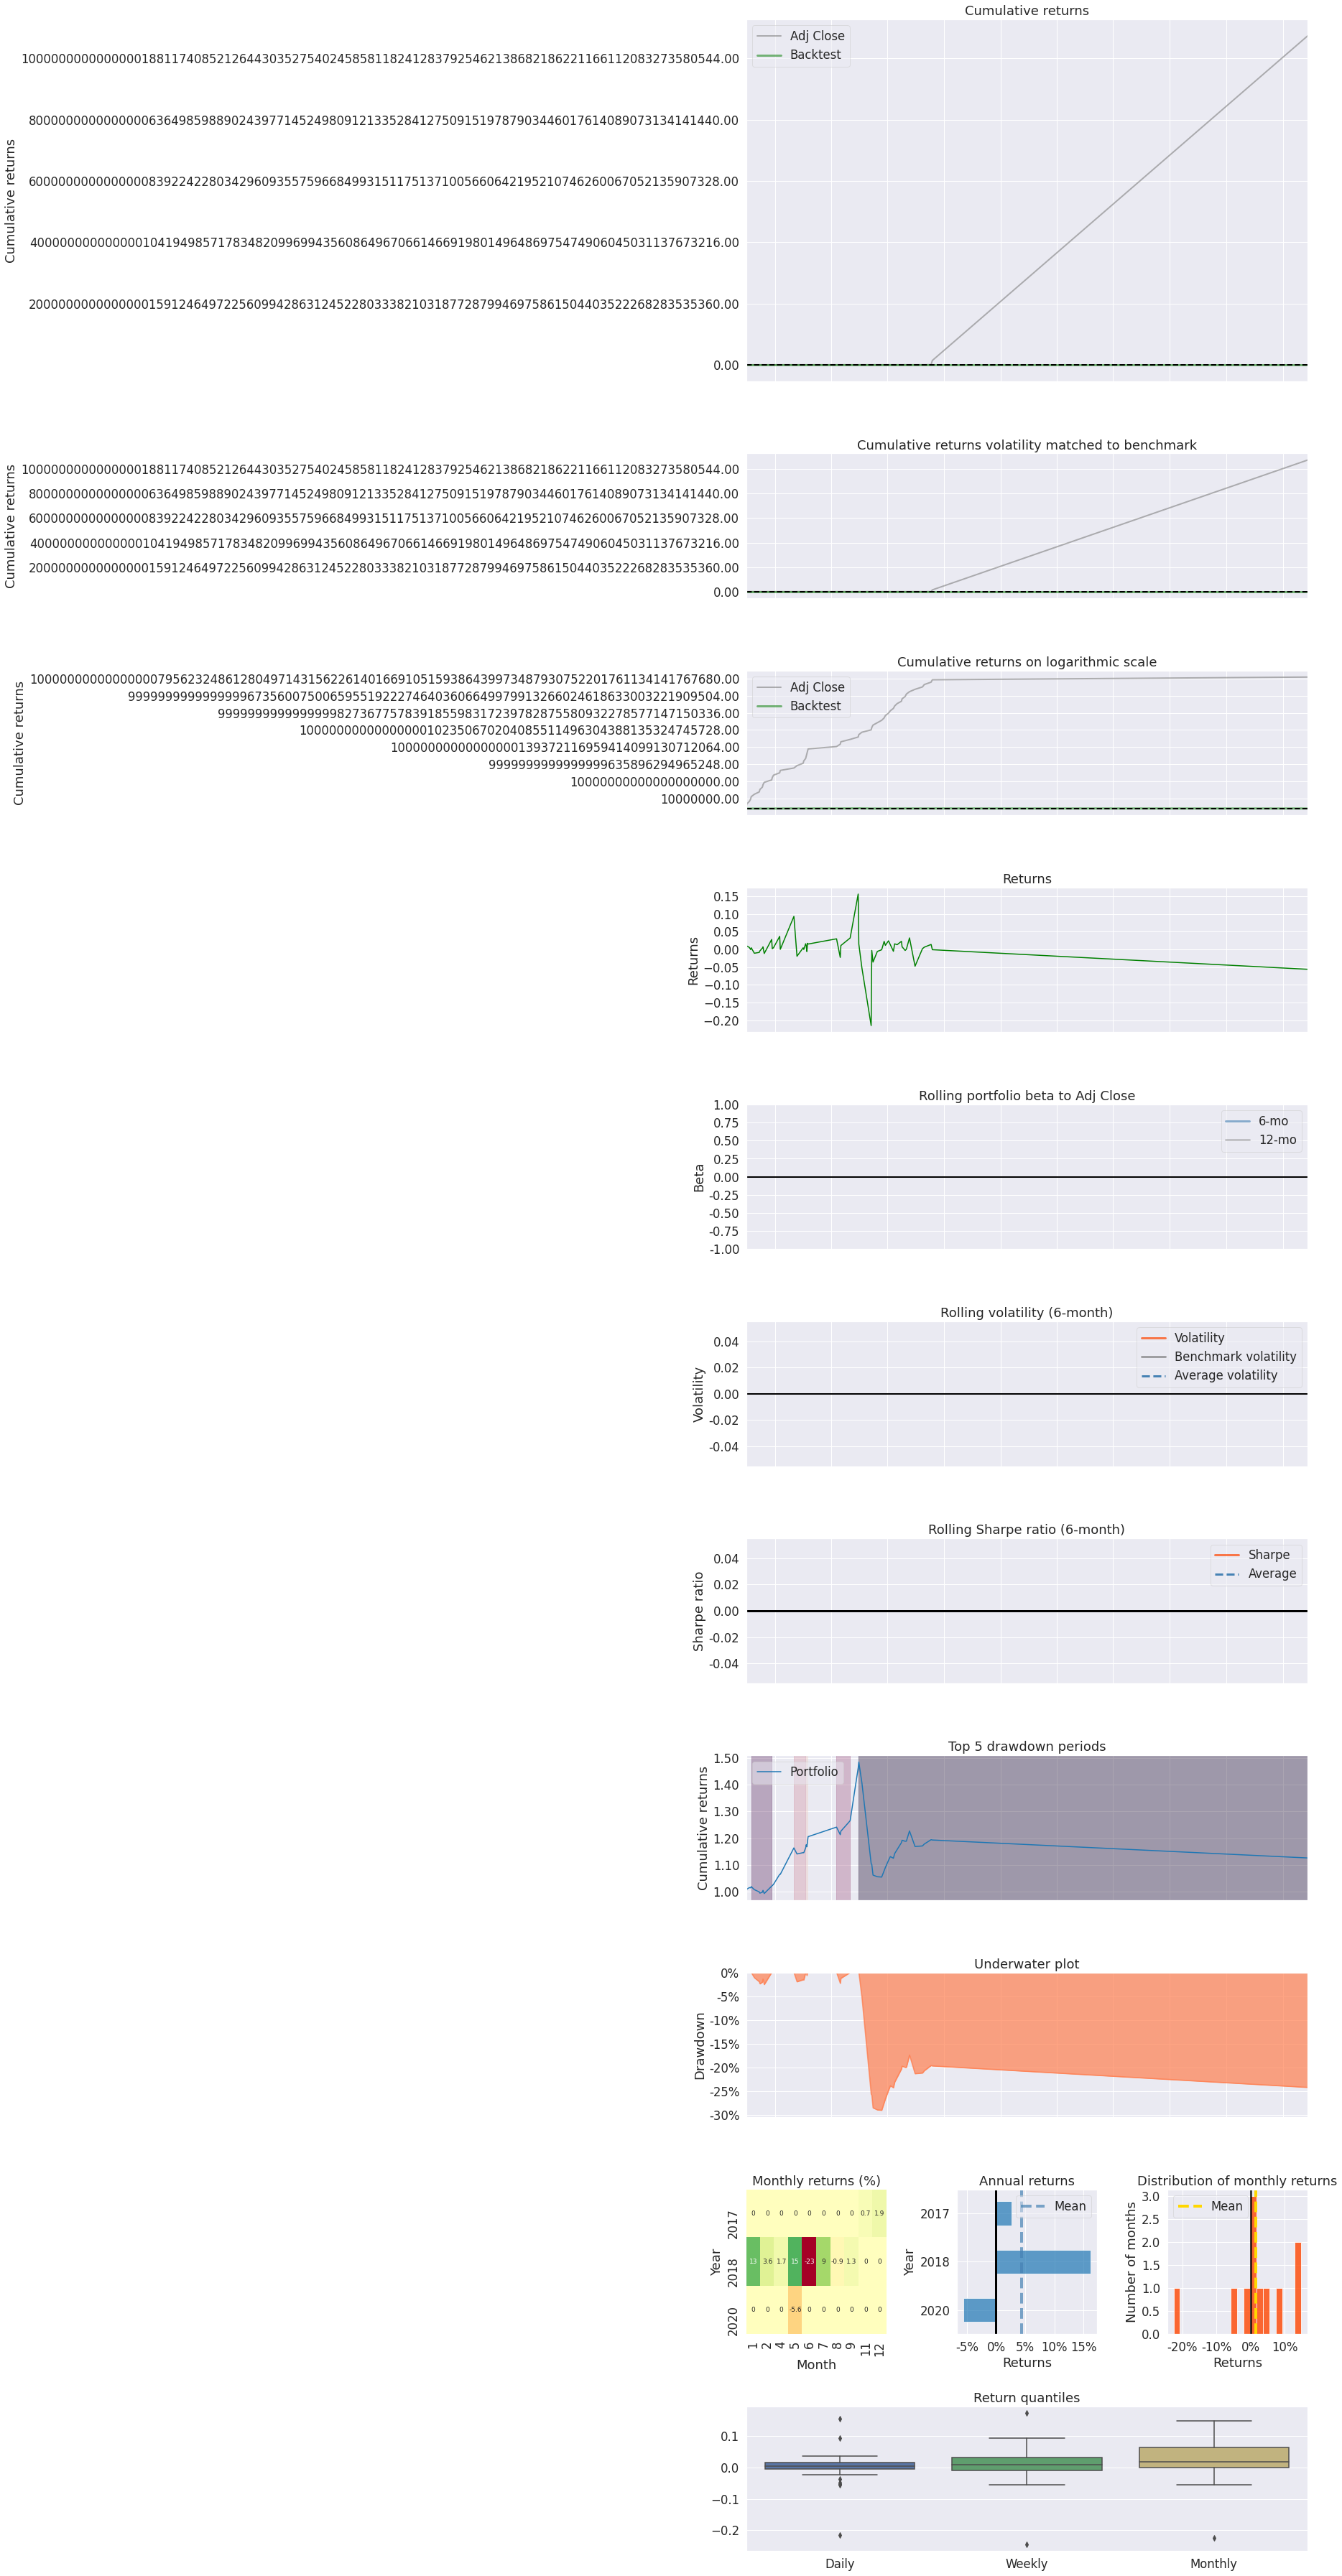

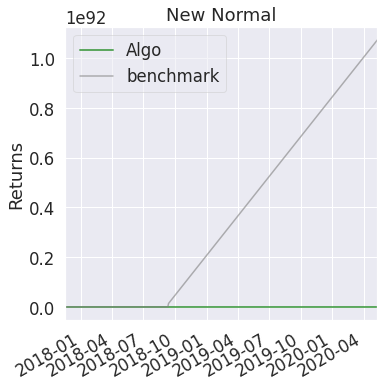

In [18]:
pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets= bova)


KeyError: ignored

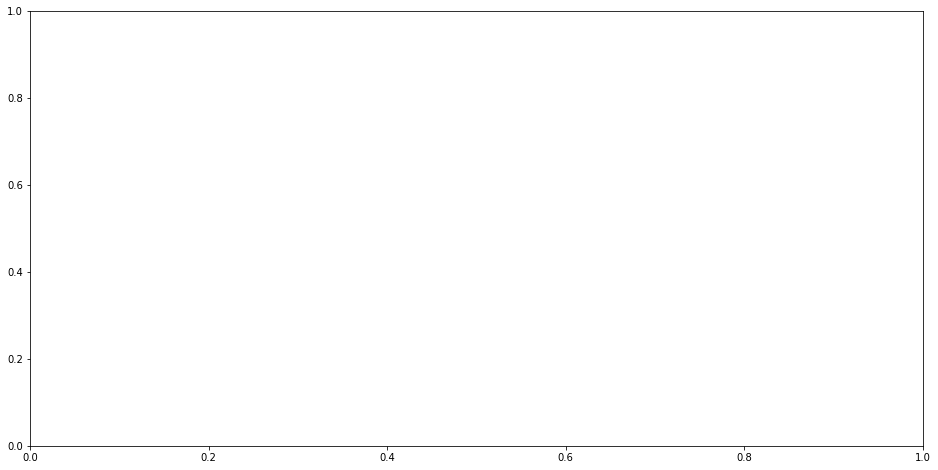

In [16]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(carteira["retorno"], factor_returns=retorno["^BVSP"], ax=ax1)
plt.ylim((0.8, 1.4));